In [6]:
from utils import Dataset, init_notebook
init_notebook()
ds = Dataset.from_sheets()
import seaborn as sns

Długość skrzydła P (cm) female: mean=31.46, std=0.63, cv=0.02
Długość skrzydła P (cm) male: mean=32.73, std=0.86, cv=0.03
Mann-Whitney 'u' Długość skrzydła P (cm) by gender: pvalue=0.01
Saving plot to 'images/Długość skrzydła P (cm) by gender.png'


<Axes: xlabel='Płeć', ylabel='Długość skrzydła P (cm)'>

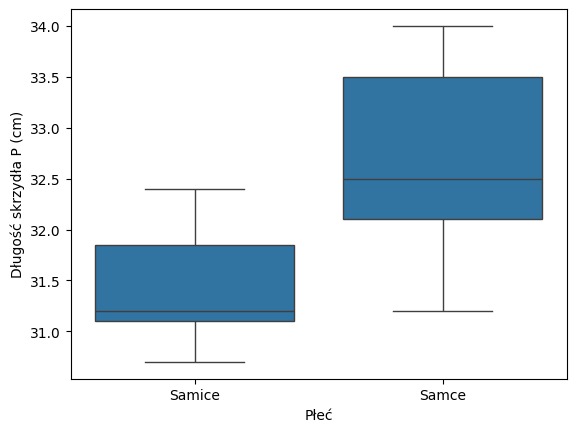

In [7]:
ds.compare_by_gender(x="Długość skrzydła P (cm)")

In [8]:
ds.df.columns

Index(['Długość dzioba (cm)', 'Grubość dzioba (cm)', 'Długość głowy (cm)',
       'Szerokość głowy (cm)', 'Długość tułowia (cm)', 'Długość ciała (cm)',
       'Długość skrzydła P (cm)', 'Długość skrzydła L (cm)',
       'Rozpiętość skrzydeł (cm)', 'Szerokość klatki piersiowej (cm)',
       'Obwód klatki piersiowej (cm)', 'Głębokość klatki piersiowej (cm)',
       'Długość ogona (cm)', 'Średnica stępu/skoku LEWEGO (cm)', 'Umaszczenie',
       'Długość przełyku z wolem (cm)', 'Długość żołądka gruczołowego (cm)',
       'Masa żołądka mięśniowego (g)', 'Obwód żołądka mięśniowego (cm)',
       'Objętość żołądka mięśniowego (ml)', 'Długość dwunastnicy (cm)',
       'Długość jelita czczego (cm)', 'Długość jelita biodrowego (cm)',
       'Długość jelita ślepego P (cm)', 'Długość jelita ślepego L (cm)',
       'Okrężnica z odbytnicą (cm)', 'Masa serca (g)', 'Masa wątroby (g)',
       'Nerki P', 'Nerki L', 'Płeć', 'Długość ciała (cm)', 'Masa ciała (g)'],
      dtype='object')

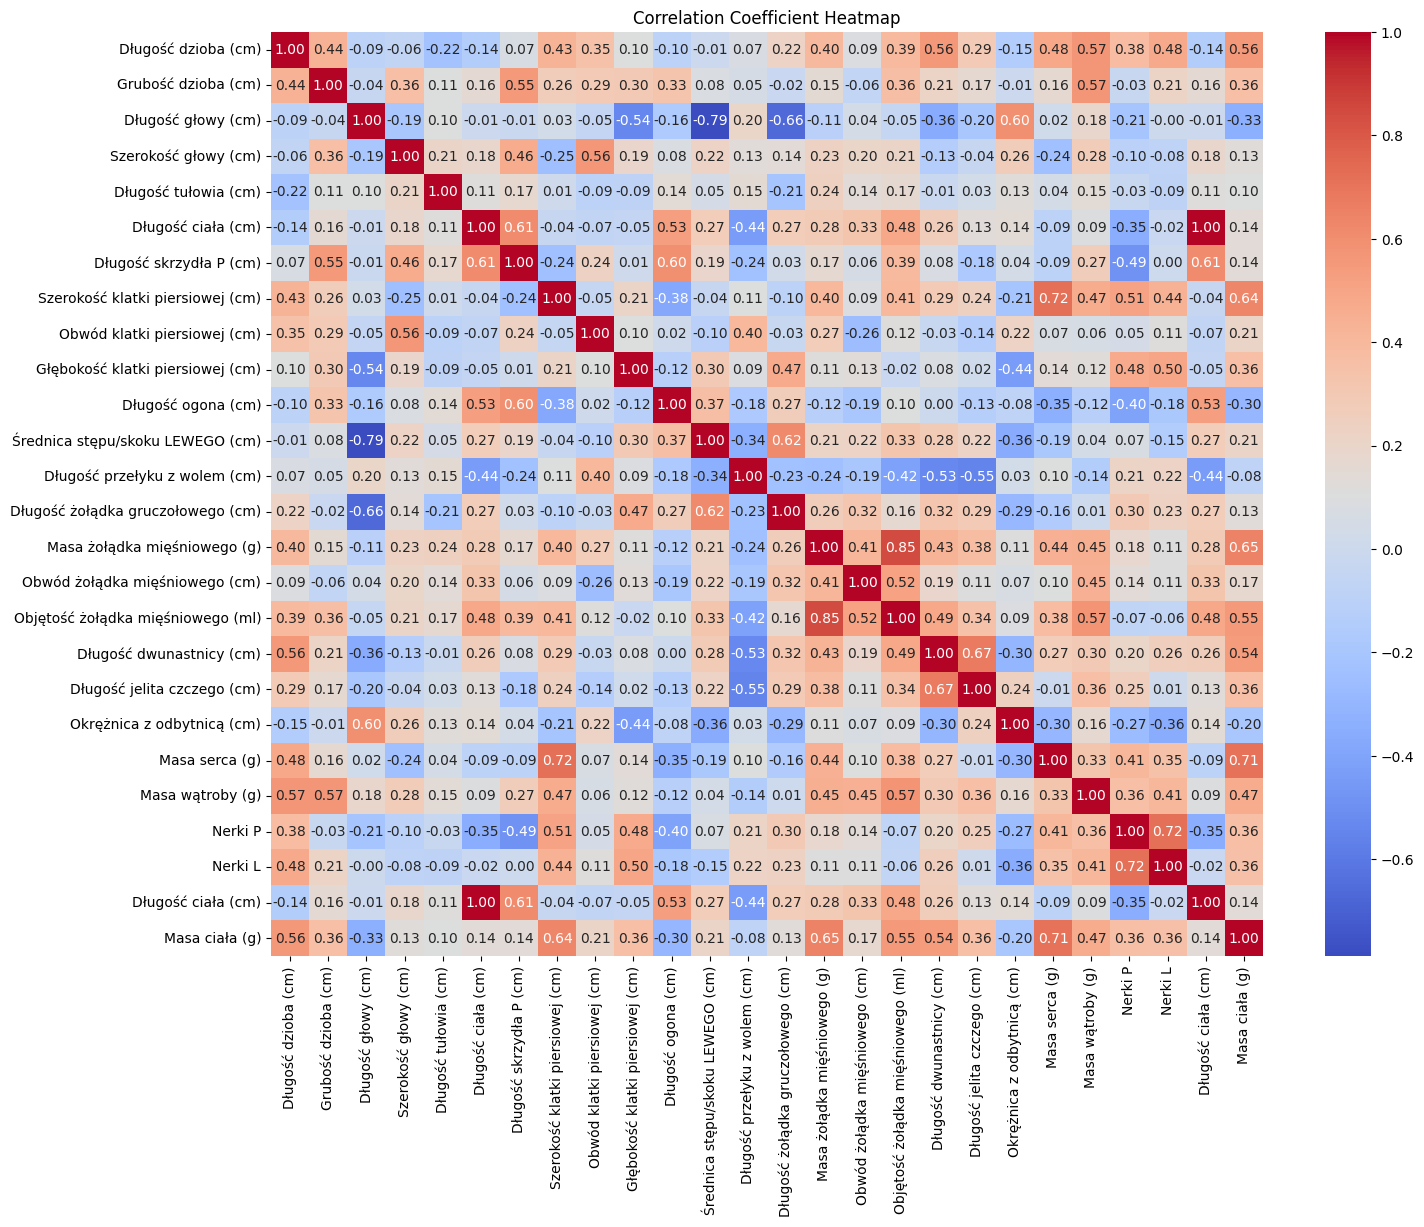

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = ds.df.corr(numeric_only=True)

# Mask the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=False)
plt.title("Correlation Coefficient Heatmap")
plt.show()

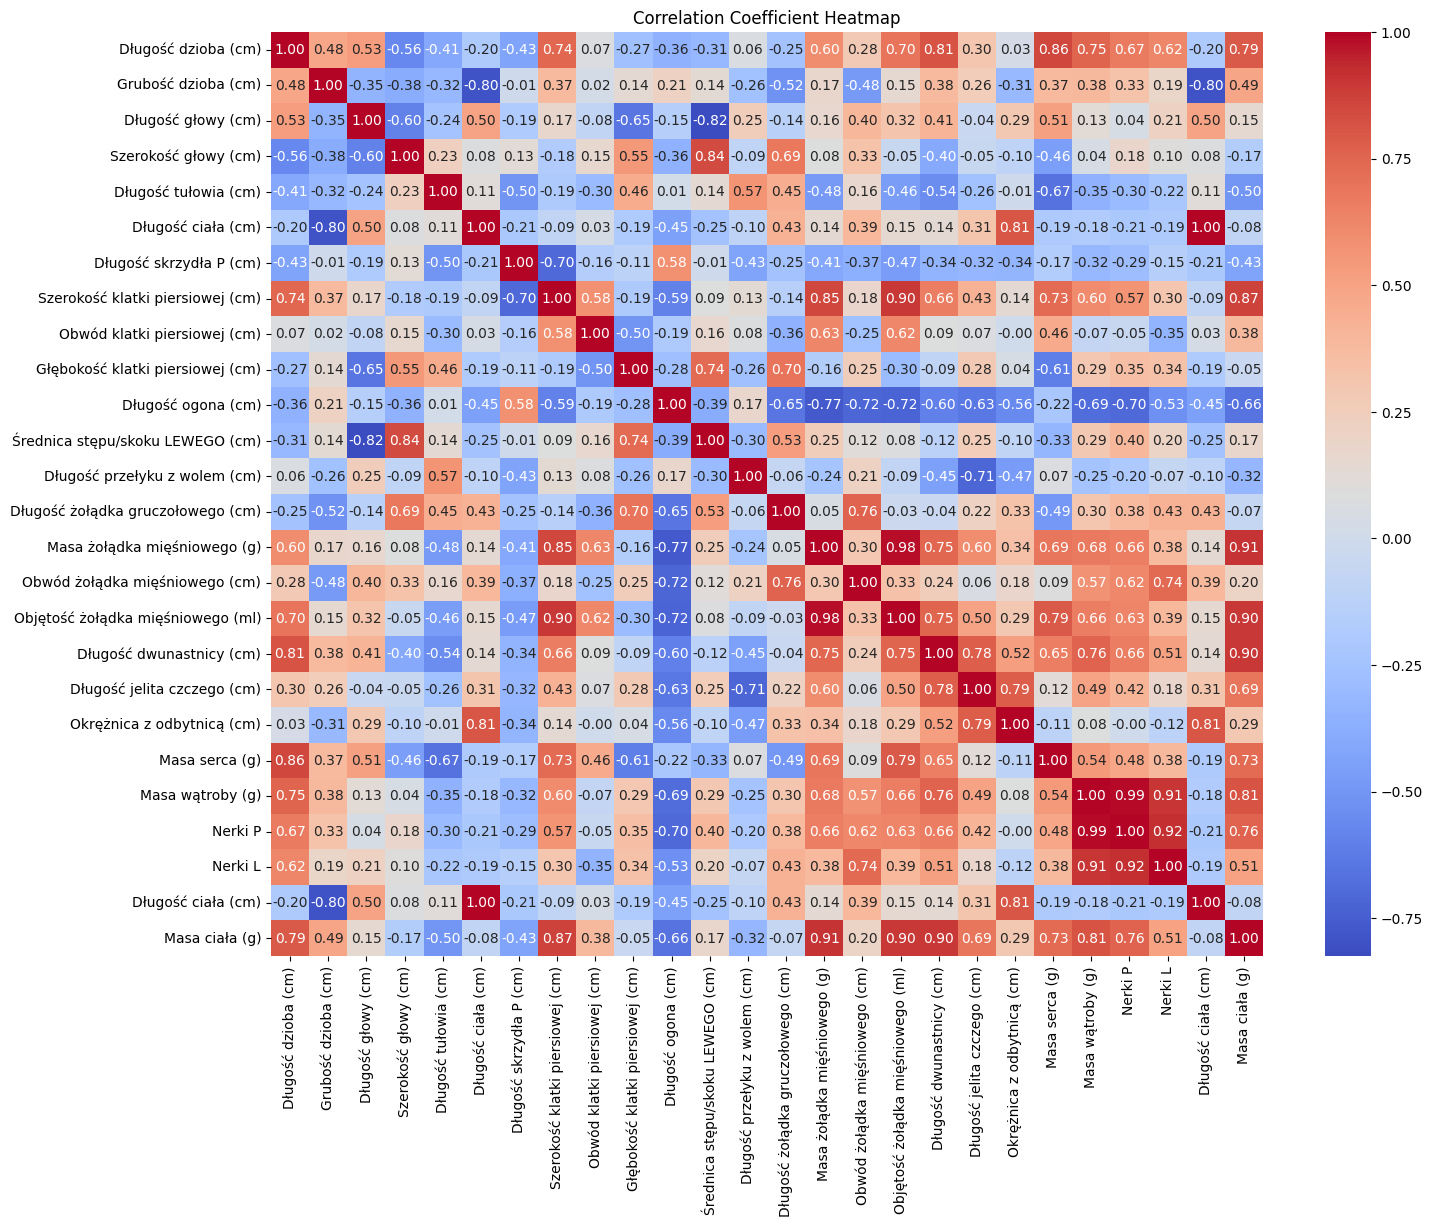

In [14]:
# Compute the correlation matrix
corr = ds.df[ds.df["Płeć"] == "Samice"].corr(numeric_only=True)

# Mask the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=False)
plt.title("Correlation Coefficient Heatmap")
plt.show()

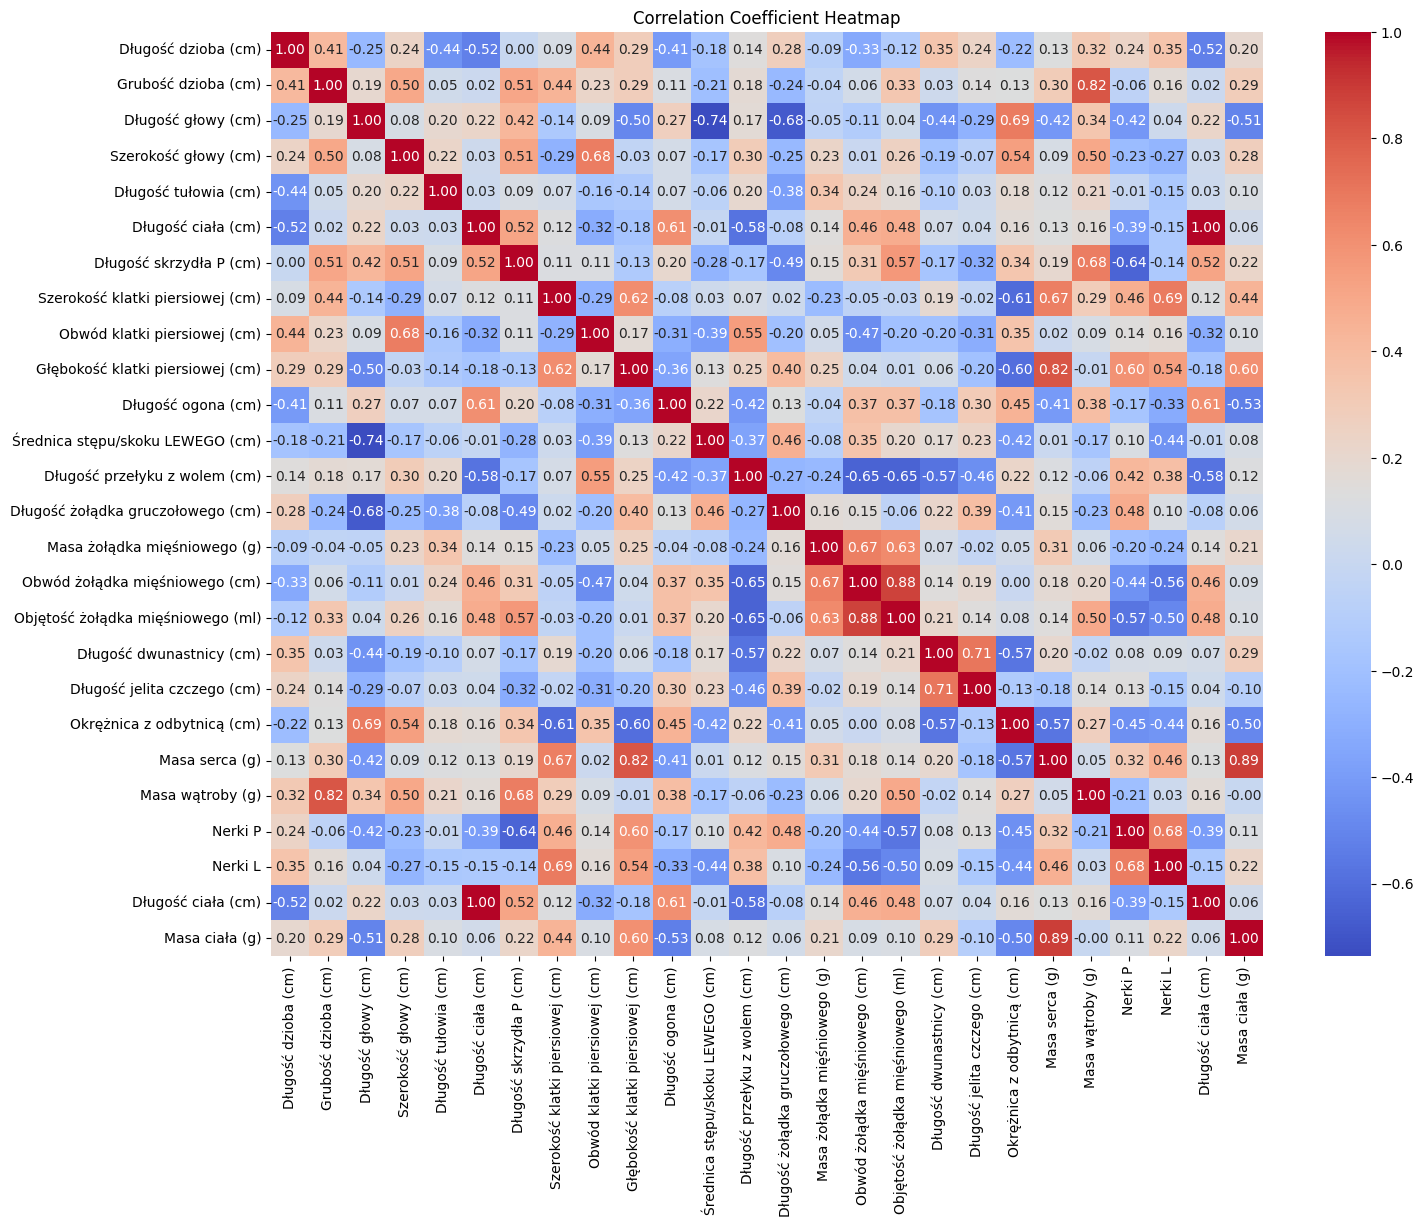

In [15]:
corr = ds.df[ds.df["Płeć"] == "Samce"].corr(numeric_only=True)

# Mask the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=False)
plt.title("Correlation Coefficient Heatmap")
plt.show()

In [11]:
corr = ds.df.corr(numeric_only=True)
corr.to_clipboard()
corr.to_excel("out.xlsx")

Długość dzioba (cm)
Grubość dzioba (cm)
Długość głowy (cm)
Szerokość głowy (cm)
Długość tułowia (cm)
Długość skrzydła P (cm)
Szerokość klatki piersiowej (cm)
Obwód klatki piersiowej (cm)
Głębokość klatki piersiowej (cm)
Długość ogona (cm)
Średnica stępu/skoku LEWEGO (cm)
Długość przełyku z wolem (cm)
Długość żołądka gruczołowego (cm)
Masa żołądka mięśniowego (g)
Obwód żołądka mięśniowego (cm)
Objętość żołądka mięśniowego (ml)
Długość dwunastnicy (cm)
Długość jelita czczego (cm)
Okrężnica z odbytnicą (cm)
Masa serca (g)
Masa wątroby (g)
Nerki P
Nerki L
Masa ciała (g)


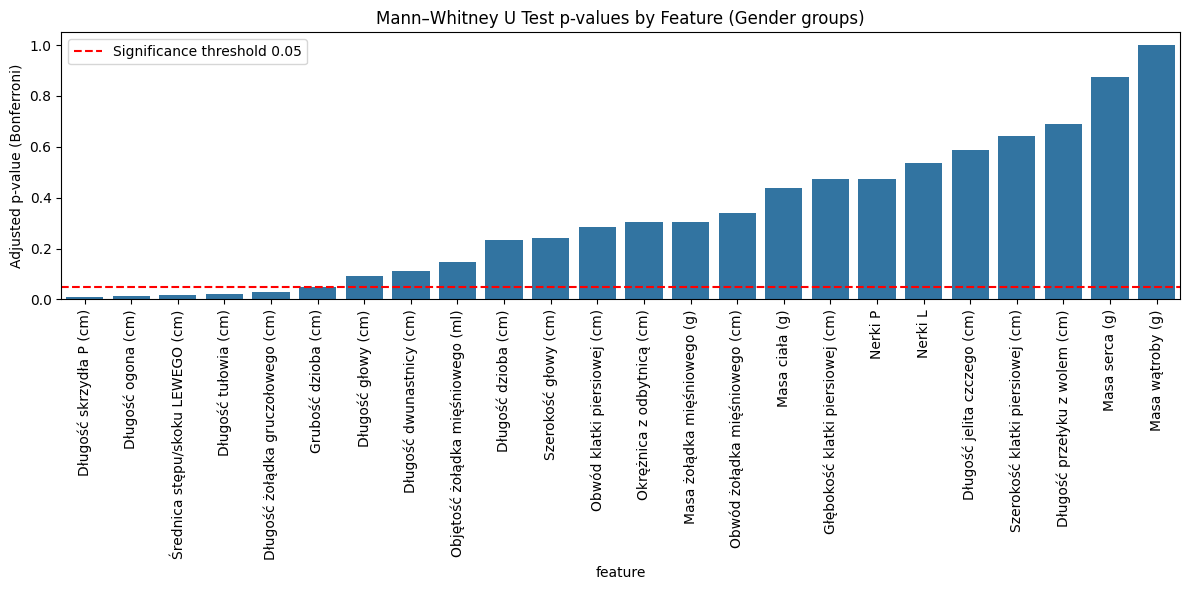

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np

# Assuming df: rows=samples, columns=features
# gender: Series aligned with df.index, values 'male'/'female'

pvals = []
features = []
df = ds.df
for col in [
    "Długość dzioba (cm)",
    "Grubość dzioba (cm)",
    "Długość głowy (cm)",
    "Szerokość głowy (cm)",
    "Długość tułowia (cm)",
    # "Długość ciała (cm)",
    "Długość skrzydła P (cm)",
    # "Długość skrzydła L (cm)",
    "Rozpiętość skrzydeł (cm)",
    "Szerokość klatki piersiowej (cm)",
    "Obwód klatki piersiowej (cm)",
    "Głębokość klatki piersiowej (cm)",
    "Długość ogona (cm)",
    "Średnica stępu/skoku LEWEGO (cm)",
    # "Umaszczenie",
    "Długość przełyku z wolem (cm)",
    "Długość żołądka gruczołowego (cm)",
    "Masa żołądka mięśniowego (g)",
    "Obwód żołądka mięśniowego (cm)",
    "Objętość żołądka mięśniowego (ml)",
    "Długość dwunastnicy (cm)",
    "Długość jelita czczego (cm)",
    # "Długość jelita biodrowego (cm)",
    # "Długość jelita ślepego P (cm)",
    # "Długość jelita ślepego L (cm)",
    "Okrężnica z odbytnicą (cm)",
    "Masa serca (g)",
    "Masa wątroby (g)",
    "Nerki P",
    "Nerki L",
    # "Płeć",
    # "Długość ciała (cm)",
    "Masa ciała (g)",
]:
    print(col)
    group1 = df[df["Płeć"] == "Samice"][col]
    group2 = df[df["Płeć"] == "Samce"][col]

    if len(group1) > 0 and len(group2) > 0:
        _, p = mannwhitneyu(group1, group2, alternative="two-sided")
    else:
        p = None
    if isinstance(p, list):
        p = p[0]
    pvals.append(p)
    features.append(col)

pvals_df = pd.DataFrame({"feature": features, "pvalue": pvals})

# from statsmodels.stats.multitest import multipletests

# pvals_clean = pvals_df['pvalue'].dropna()
# _, p_adj, _, _ = multipletests(pvals_clean.values, method='bonferroni')
# pvals_df.loc[pvals_clean.index, 'pvalue_adj'] = p_adj
# pvals_df['pvalue_adj'].fillna(1, inplace=True)
# pvals_df["neg_log10_p"] = -np.log10(pvals_df["pvalue"].replace(0, 1e-300))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="feature", y="pvalue", data=pvals_df.sort_values(by="pvalue"),)
plt.xticks(rotation=90)
plt.ylabel("Adjusted p-value (Bonferroni)")
plt.title("Mann–Whitney U Test p-values by Feature (Gender groups)")
plt.axhline(0.05, color="red", linestyle="--", label="Significance threshold 0.05")
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
pvals_df.sort_values(by="pvalue").to_excel("pvals.xlsx")

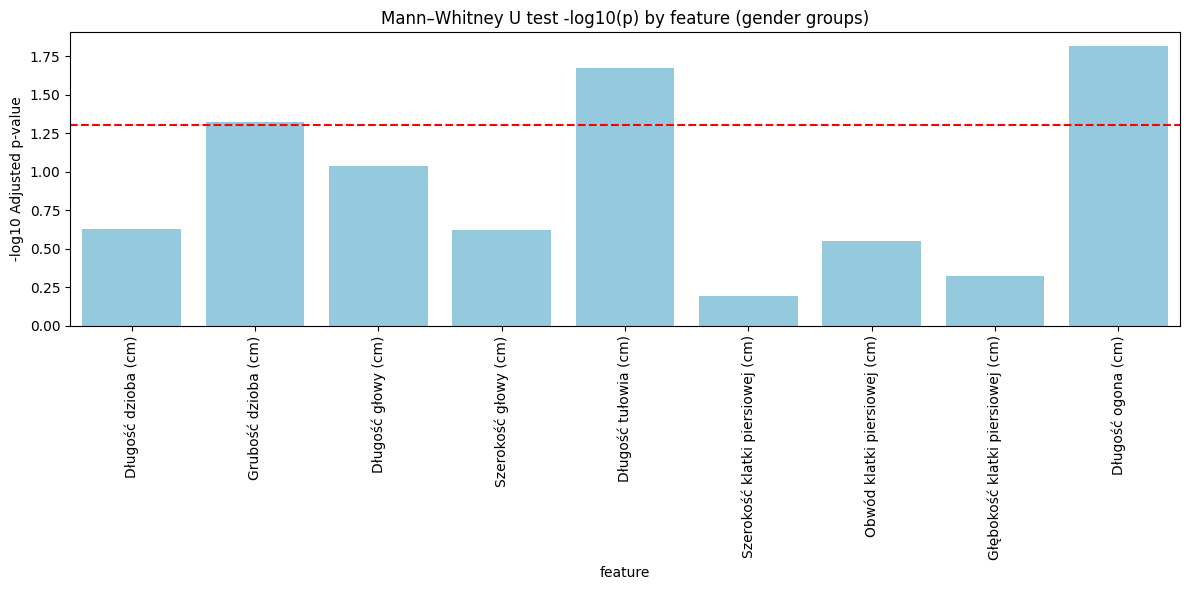

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=pvals_df, x='feature', y='neg_log10_p', color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('-log10 Adjusted p-value')
plt.title('Mann–Whitney U test -log10(p) by feature (gender groups)')
threshold = -np.log10(0.05)  # ~1.3
plt.axhline(threshold, color='red', linestyle='--', label='Significance threshold (0.05)')
plt.tight_layout()
plt.show()

In [35]:
pvals_df

,feature,pvalue
0,Długość dzioba (cm),0.234404
1,Grubość dzioba (cm),0.0475
2,Długość głowy (cm),0.092714
3,Szerokość głowy (cm),0.241357
4,Długość tułowia (cm),0.021216
5,Długość ciała (cm),"[0.011067754033995557, 0.011067754033995557]"
6,Szerokość klatki piersiowej (cm),0.642647
7,Obwód klatki piersiowej (cm),0.284356
8,Głębokość klatki piersiowej (cm),0.475232
9,Długość ogona (cm),0.01538


In [64]:
len(1)

TypeError: object of type 'int' has no len()